<a href="https://colab.research.google.com/github/pacayton/Forecasting_Codes/blob/main/Ch_2_Time_Series_Graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Preamble Code

### install.packages(c("fpp2", "tidyverse", "forecast"))

library(fpp2)
library(tidyverse)
library(forecast)

In [ ]:
## Sample Data to be used from Github:

philmonth <- read_csv("https://raw.githubusercontent.com/pacayton/Forecasting_Codes/refs/heads/main/Datasets/PhilMonthlyData.csv")

philquarter <- read_csv("https://raw.githubusercontent.com/pacayton/Forecasting_Codes/refs/heads/main/Datasets/PhilQuarterData.csv")



Rows: 264 Columns: 37
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (36): cpi, cpifbt, deporate_savings, dubaicrude, expenditures, exports,...
date  (1): _date_

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 112 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (18): agri, volpal, dubai, cpi, expt, gdp, gov, impt, ind, libor3, nfia...
date  (1): _date_

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
## ts objects

y <- ts(c(123, 39, 78, 52, 110), start = 2012)

y

A Time Series:
[1] 123  39  78  52 110

In [ ]:
philquarter

_date_,agri,volpal,dubai,cpi,expt,gdp,gov,impt,ind,libor3,nfia,nonagri,ofwremit,pce,serv,tbill91,tbillall,unemp
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1981-01-01,36714,NA,37.73333,12.96667,43619,154381,11778,42799,62230,NA,-816,117667,NA,91481,55437,NA,12.60000,NA
1981-04-01,38364,NA,33.70000,13.16667,43102,159549,12597,46783,64548,NA,-861,121185,NA,100260,56637,NA,12.73333,NA
1981-07-01,30711,NA,32.06333,13.63333,38381,148592,11947,45413,62914,NA,-1231,117881,NA,101908,54967,NA,12.96667,NA
1981-10-01,42690,NA,33.68000,13.90000,44309,168120,12353,43062,68853,NA,-1413,125430,NA,114309,56577,NA,13.16667,NA
1982-01-01,35840,NA,31.00000,14.36667,38259,159109,13455,43979,64600,NA,-2511,123269,NA,94727,58669,NA,14.13333,NA
1982-04-01,39637,NA,32.29333,14.60000,41511,165495,13455,47132,66947,NA,-3490,125858,NA,103382,58911,NA,14.70000,NA
1982-07-01,28460,NA,31.98333,15.06667,33800,151909,12496,46786,64126,NA,-3414,123449,NA,104297,59323,NA,14.60000,NA
1982-10-01,45704,NA,31.75000,15.13333,37737,176954,12922,44517,69284,NA,-2542,131250,NA,119661,61966,NA,14.30000,NA
1983-01-01,36655,NA,29.05000,15.26667,39158,164767,12071,43427,66335,NA,-2958,128112,NA,96487,61777,NA,14.36667,NA


In [ ]:
philmonth

_date_,cpi,cpifbt,deporate_savings,dubaicrude,expenditures,exports,fx_rate,gir,hotel_occupancy,⋯,ricep,sale_app,sale_automotive,sibor_3m,sibor_6m,tbill182_1,tbill364_1,tbill91_1,v_arrival,wpi
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1989-01-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-02-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-03-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-04-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-05-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-06-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-07-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-08-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989-09-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
## ts object with frequency information

gdp <- ts(philquarter$gdp, start = c(1981,1), frequency = 4)

ofw_remit <- ts(philmonth$remit, start = c(1989,1), frequency = 12)

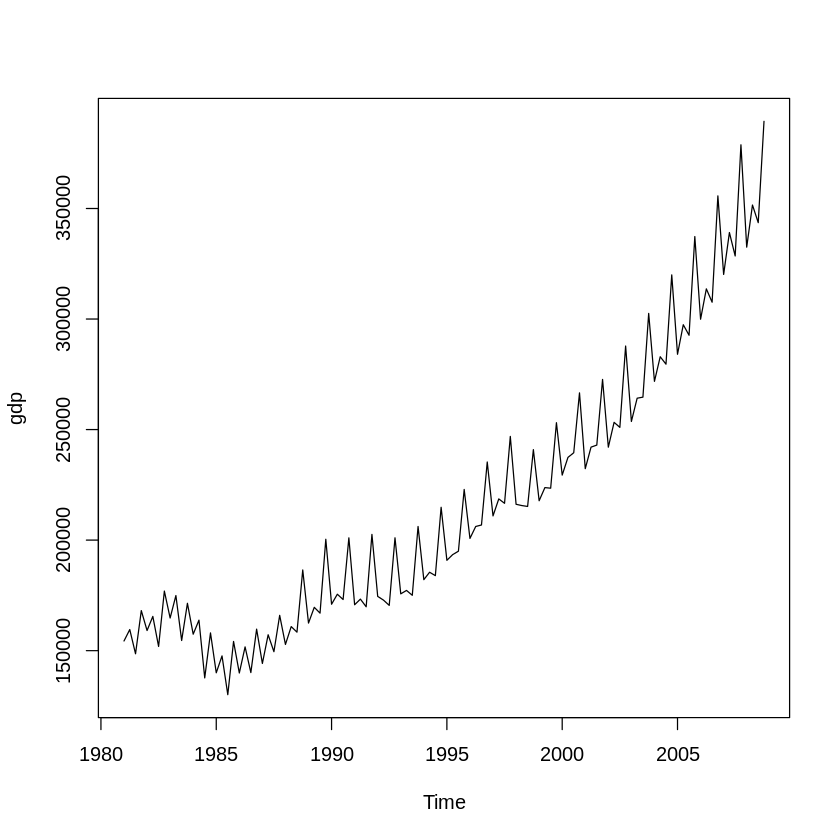

In [ ]:
## Basic plot function for time plot

plot(gdp)

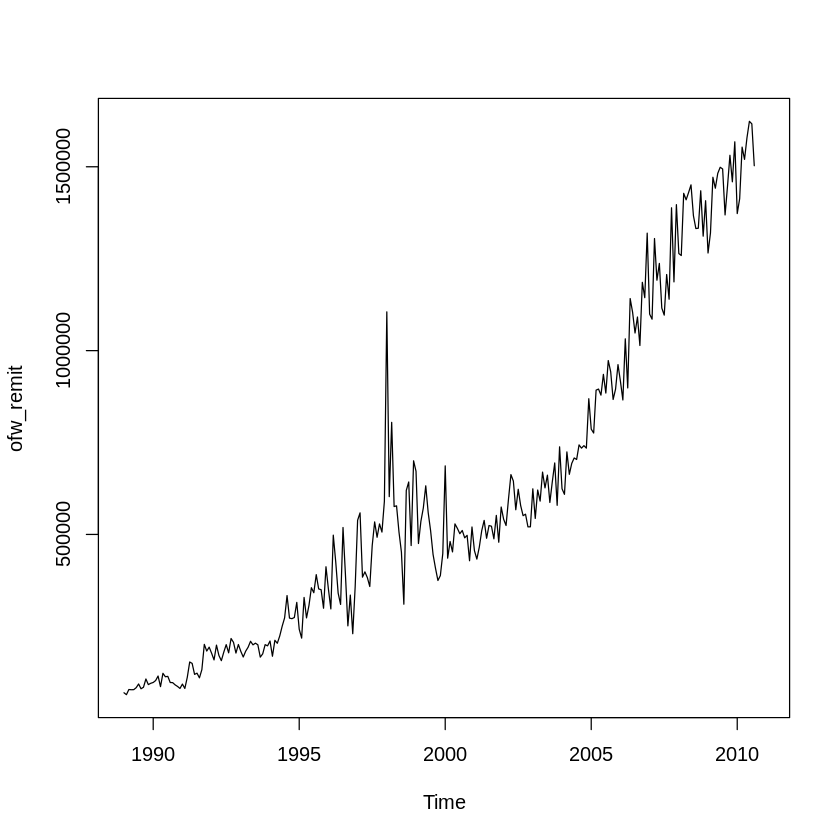

In [ ]:
plot(ofw_remit)

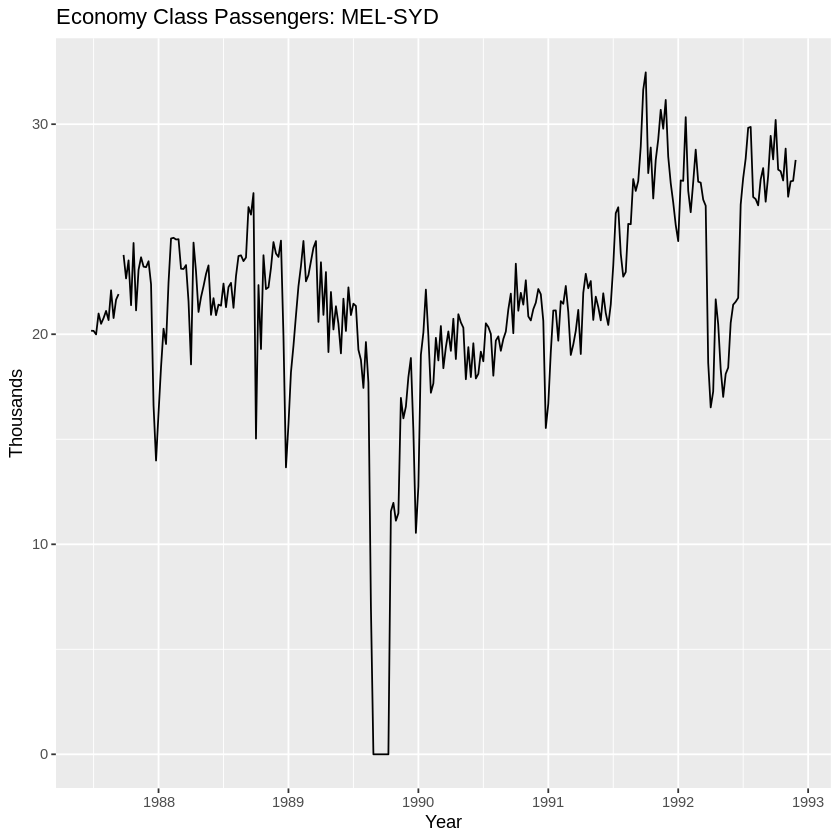

In [ ]:
## Through the autoplot (ggplot2 as backend)

## Ansett Airlines data

autoplot(melsyd[, "Economy.Class"]) +
  ggtitle("Economy Class Passengers: MEL-SYD") +
  xlab("Year") +
  ylab("Thousands")

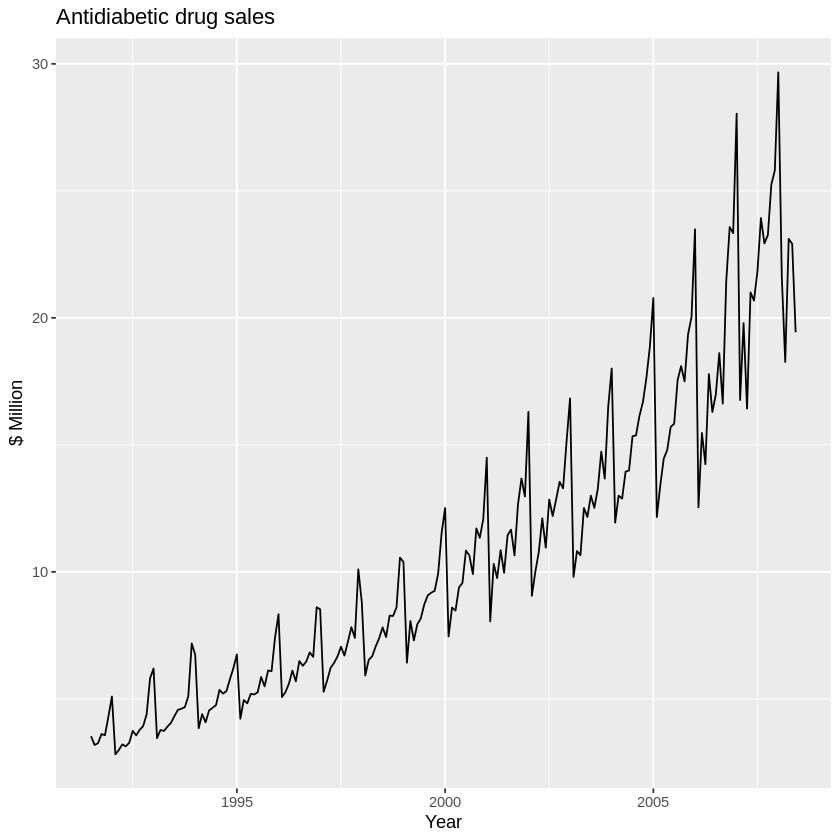

In [ ]:
## Anti-diabetic Drug Sales

autoplot(a10) +
  ggtitle("Antidiabetic drug sales") +
  ylab("$ Million") +
  xlab("Year")

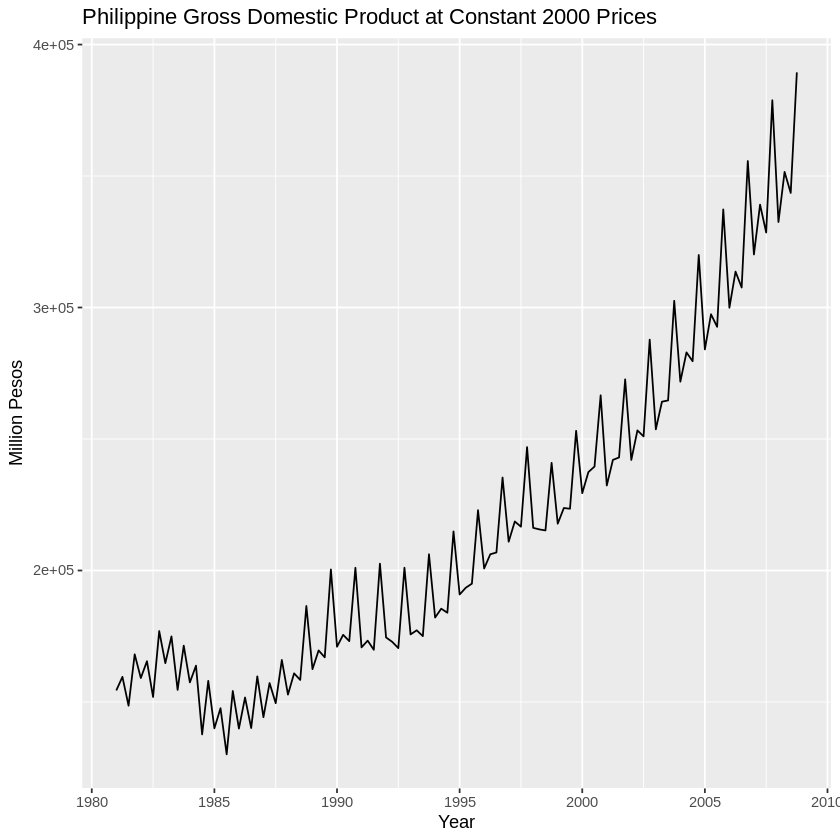

In [ ]:
## Phil GDP

autoplot(gdp) +
  ggtitle("Philippine Gross Domestic Product at Constant 2000 Prices") +
  xlab("Year") +
  ylab("Million Pesos")

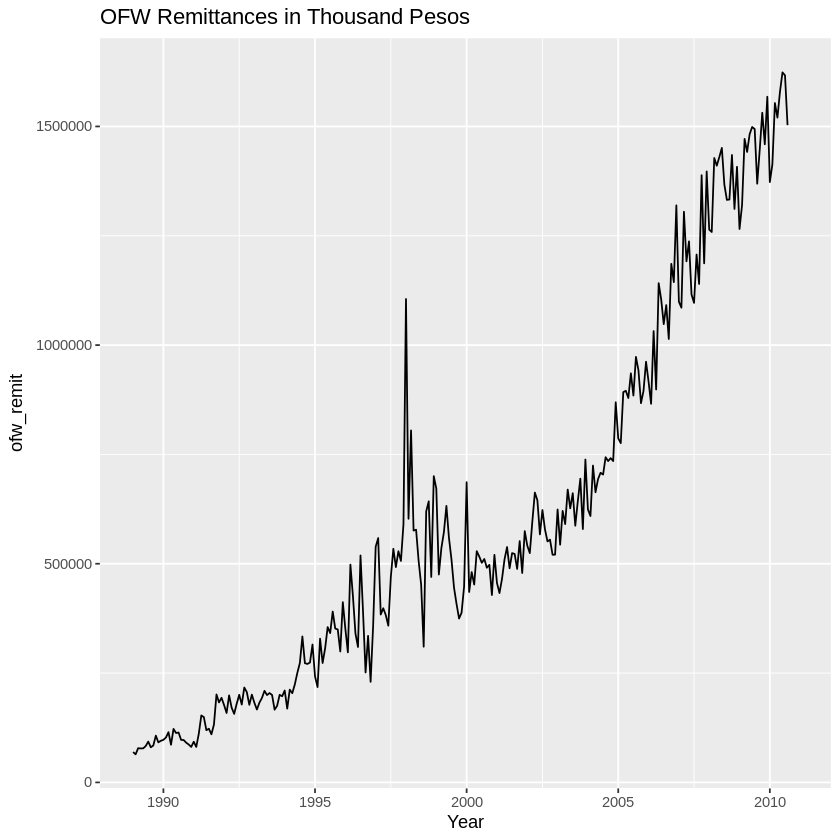

In [ ]:
## OFW Remittances

autoplot(ofw_remit) +
  ggtitle("OFW Remittances in Thousand Pesos") +
  xlab("Year")

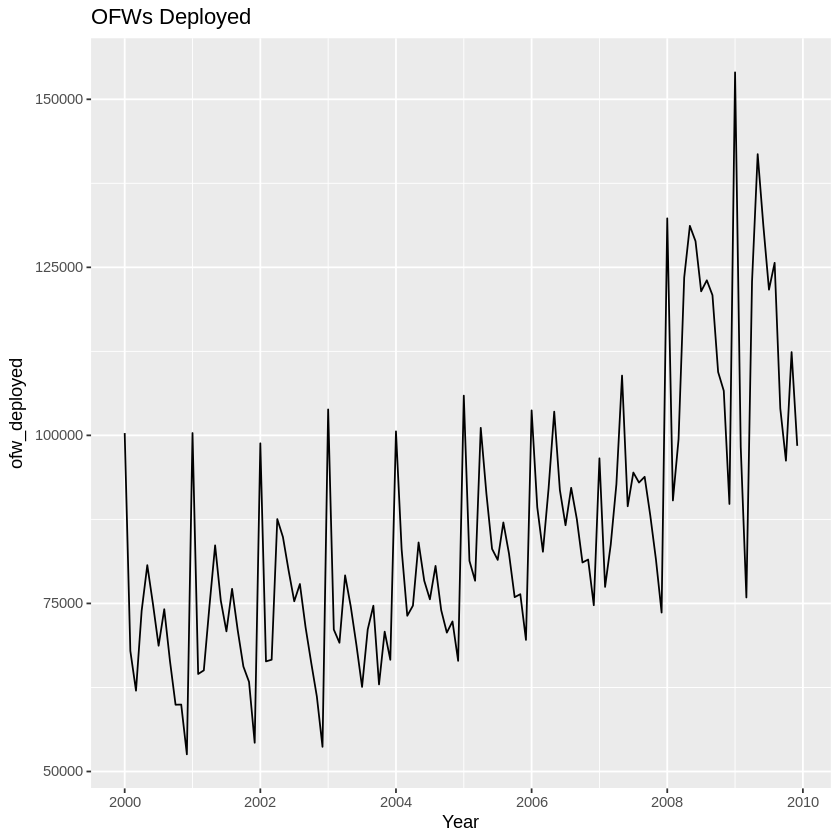

In [ ]:
## OFWs Deployed

ofw_deployed <- ts(philmonth$ofw_deployed, start = c(1989,1), frequency = 12)

## Data Clean
ofw_deployed <- na.omit(ofw_deployed)

autoplot(ofw_deployed) +
  ggtitle("OFWs Deployed") +
  xlab("Year")

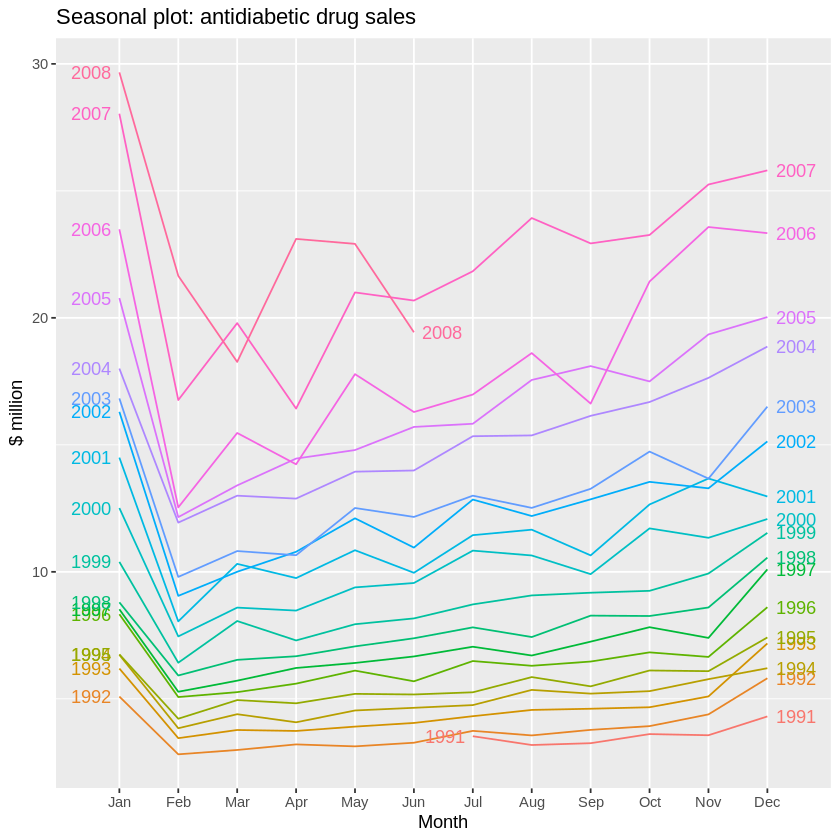

In [ ]:
## Seasonal Plots

ggseasonplot(a10, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("$ million") +
  ggtitle("Seasonal plot: antidiabetic drug sales")

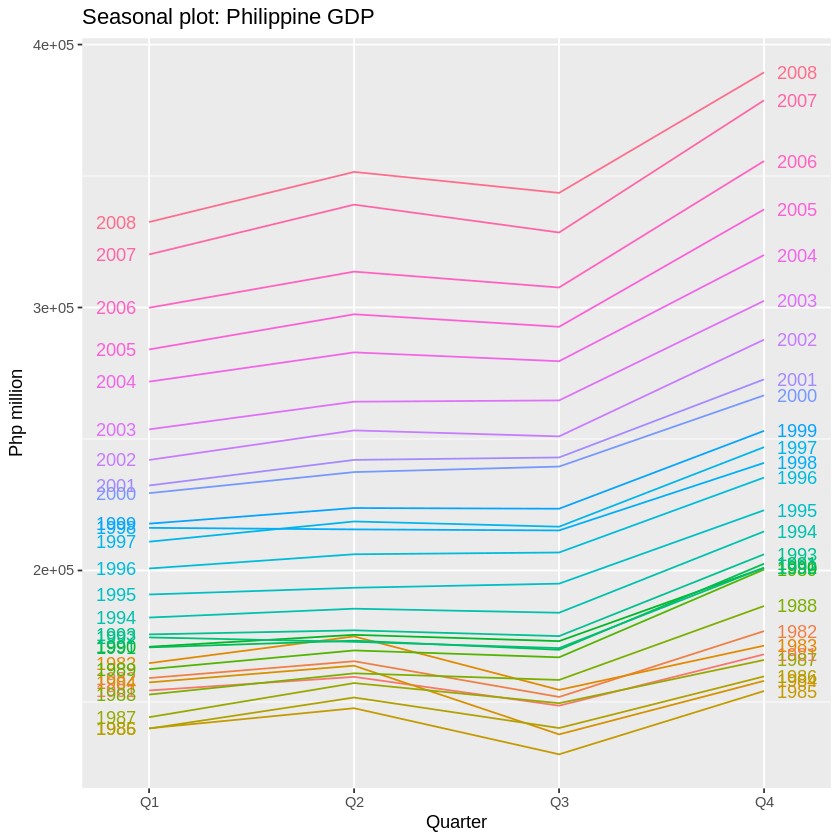

In [ ]:
## Philippine GDP

ggseasonplot(gdp, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("Php million") +
  ggtitle("Seasonal plot: Philippine GDP")

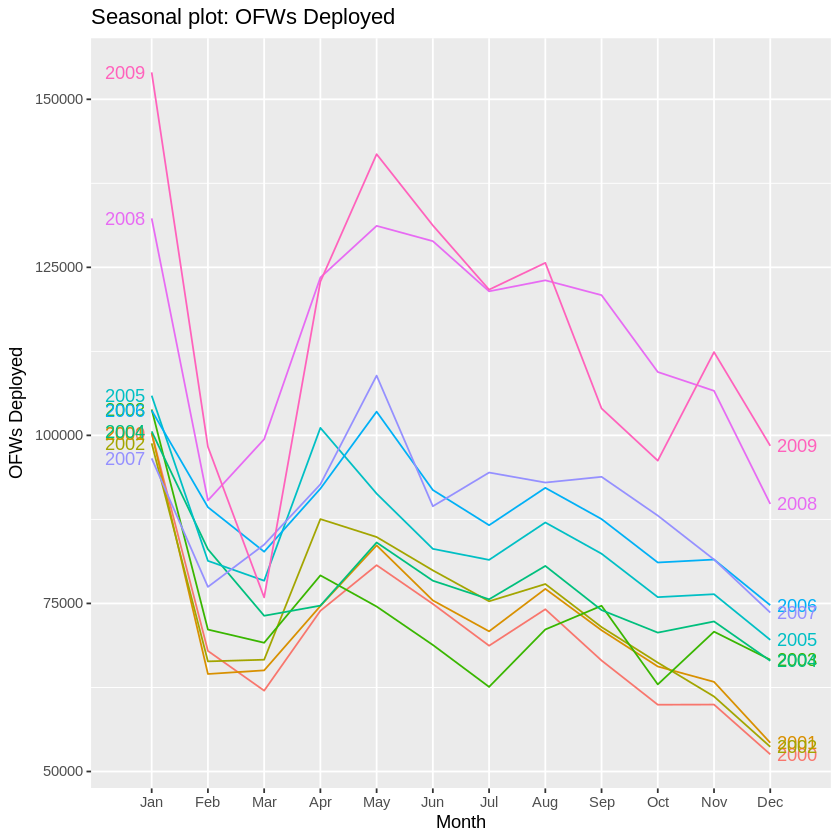

In [ ]:
## OFW Deployed

ggseasonplot(ofw_deployed, year.labels=TRUE, year.labels.left=TRUE) +
  ylab("OFWs Deployed") +
  ggtitle("Seasonal plot: OFWs Deployed")

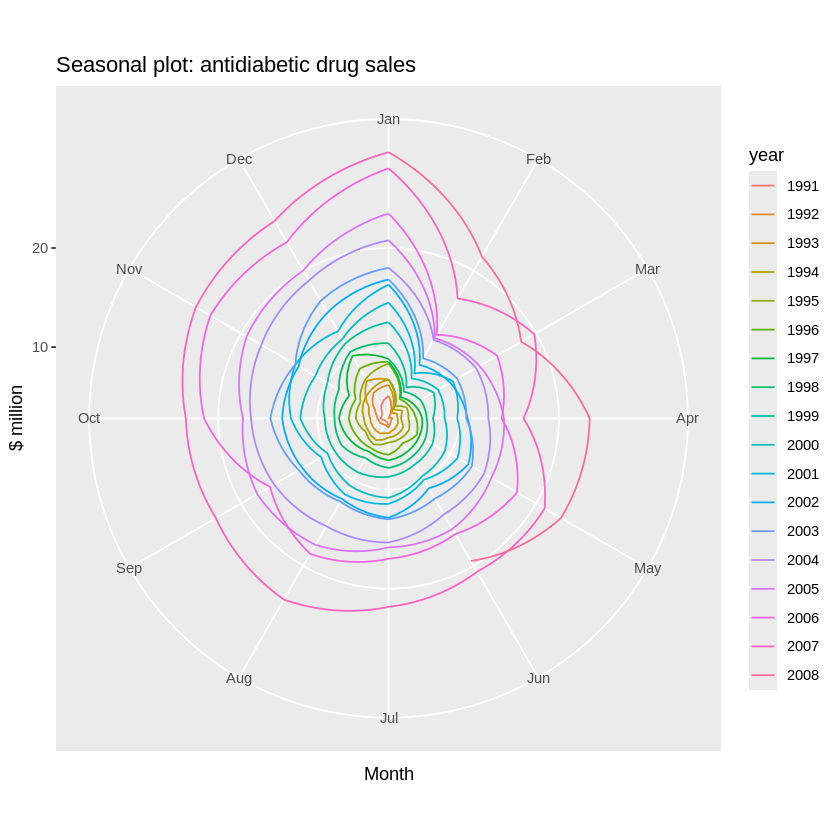

In [ ]:
## Seasonal Polar Plots

ggseasonplot(a10, polar = TRUE) +
  ylab("$ million") +
  ggtitle("Seasonal plot: antidiabetic drug sales")

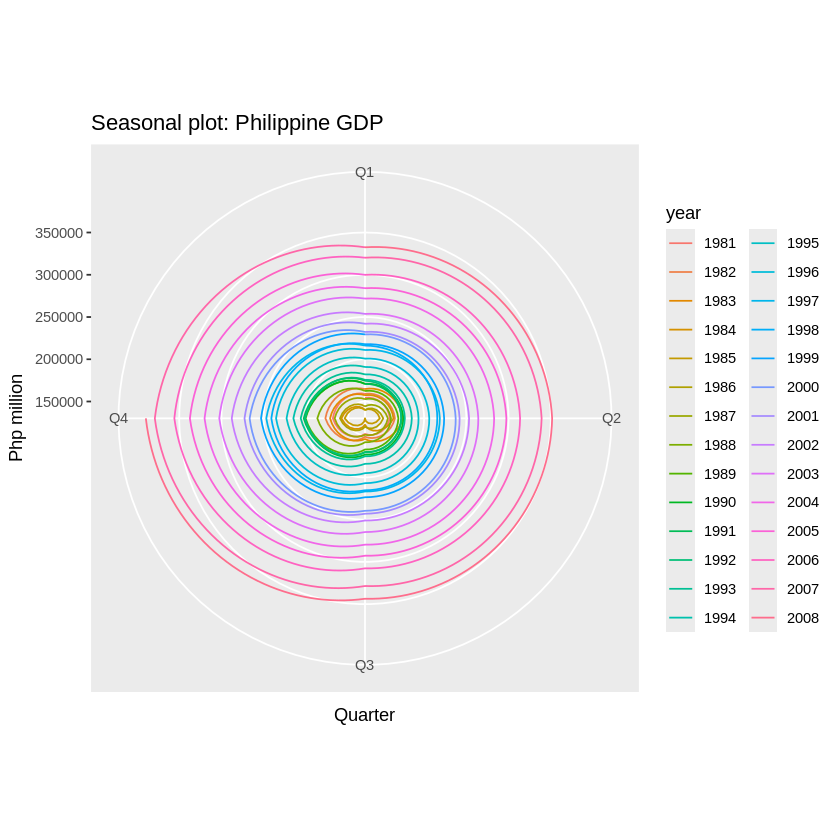

In [ ]:
## Philippine GDP

ggseasonplot(gdp,polar =TRUE) +
  ylab("Php million") +
  ggtitle("Seasonal plot: Philippine GDP")

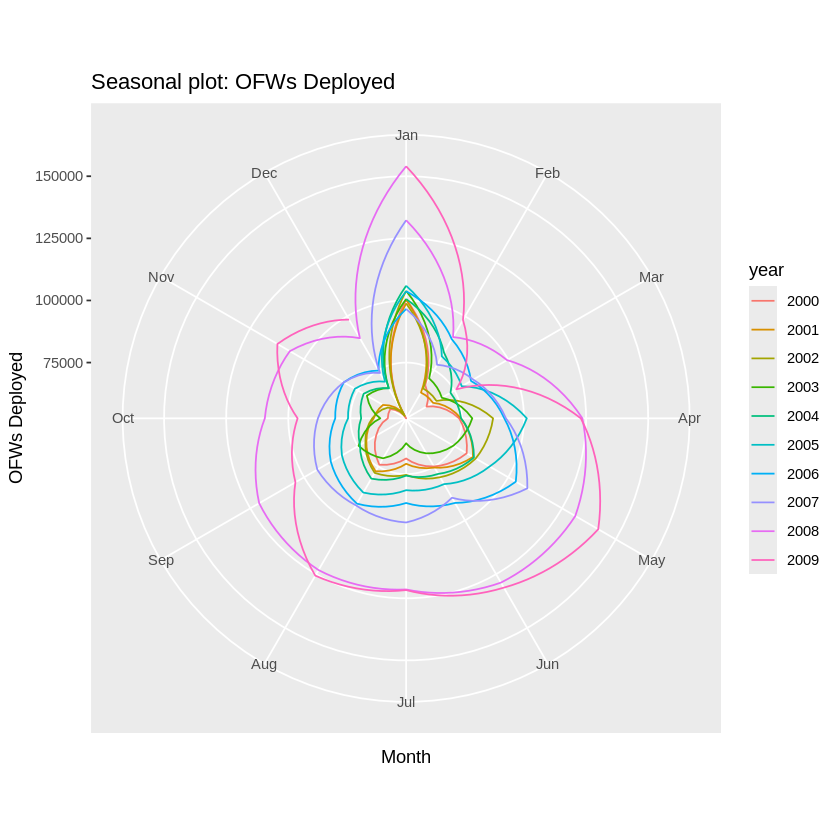

In [ ]:
## OFW Deployed

ggseasonplot(ofw_deployed, polar = TRUE) +
  ylab("OFWs Deployed") +
  ggtitle("Seasonal plot: OFWs Deployed")

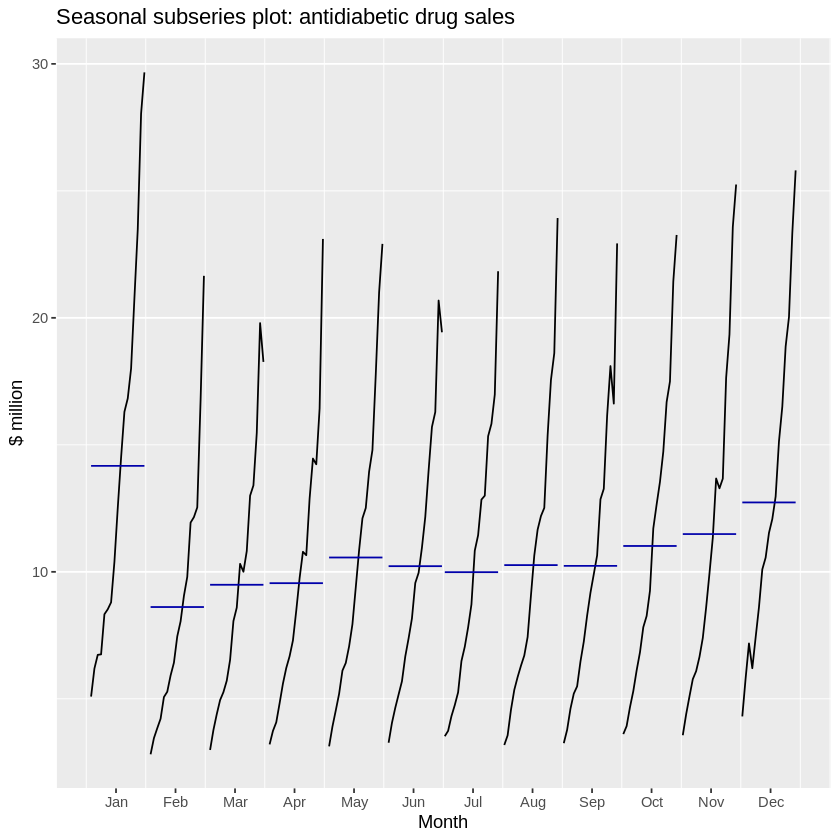

In [ ]:
## Subseries Plot

ggsubseriesplot(a10) +
  ylab("$ million") +
  ggtitle("Seasonal subseries plot: antidiabetic drug sales")

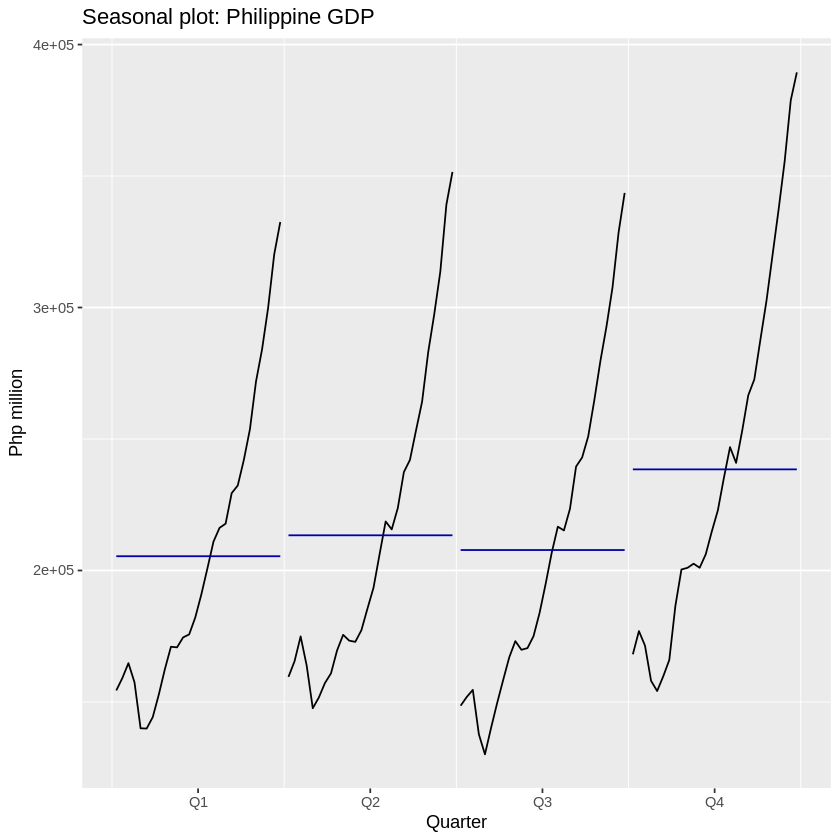

In [ ]:
## Philippine GDP

ggsubseriesplot(gdp,polar =TRUE) +
  ylab("Php million") +
  ggtitle("Seasonal plot: Philippine GDP")

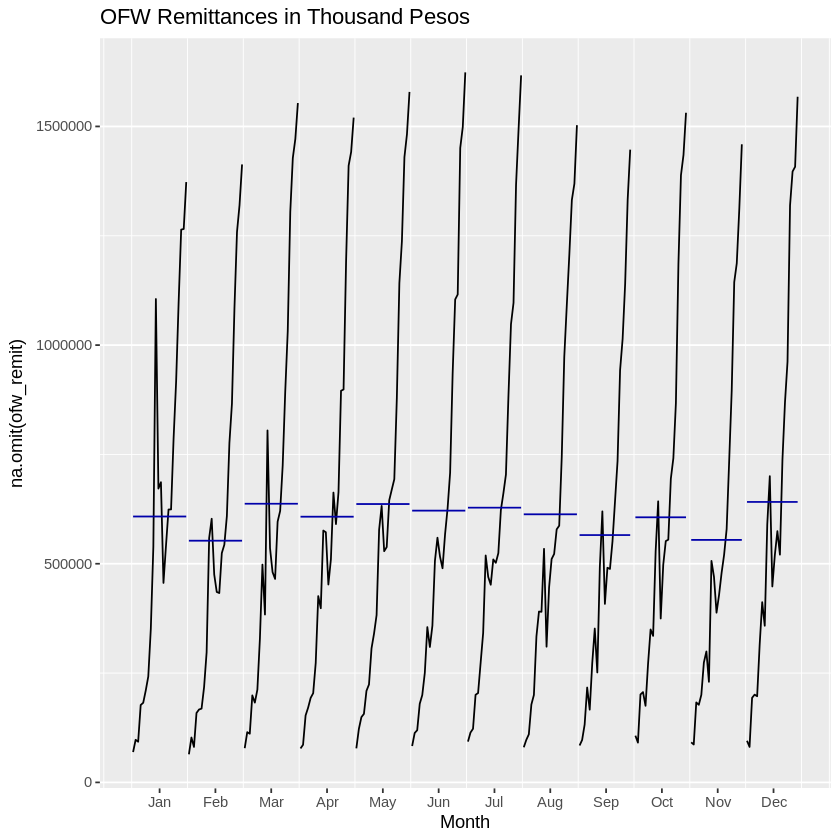

In [ ]:
## OFW Remittances

ggsubseriesplot(na.omit(ofw_remit)) +
  ggtitle("OFW Remittances in Thousand Pesos")

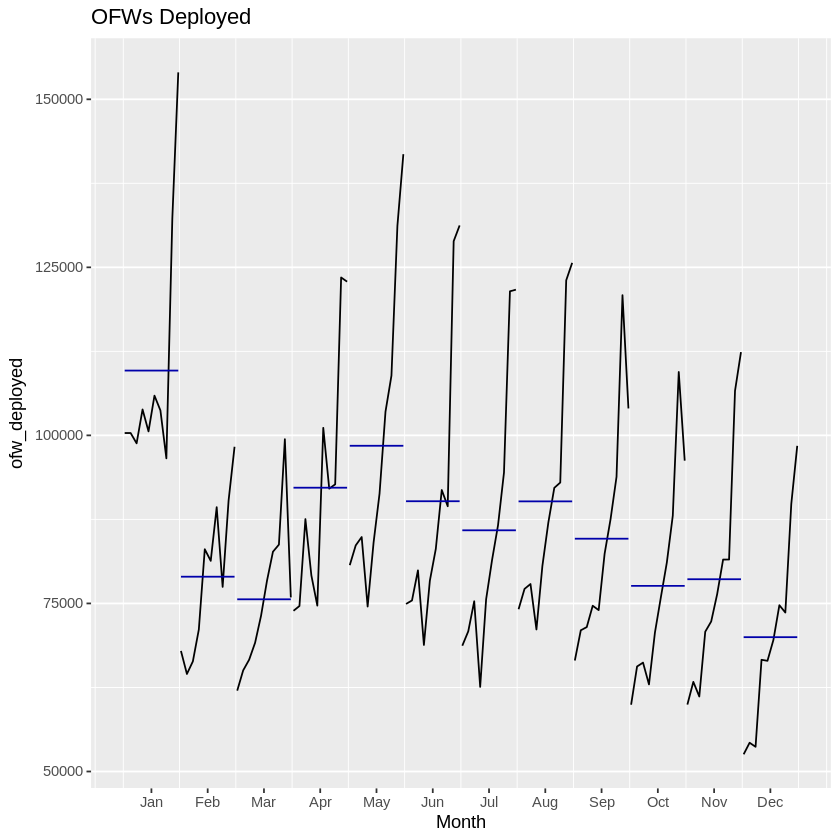

In [ ]:
## OFWs Deployed

ggsubseriesplot(ofw_deployed) +
  ggtitle("OFWs Deployed")

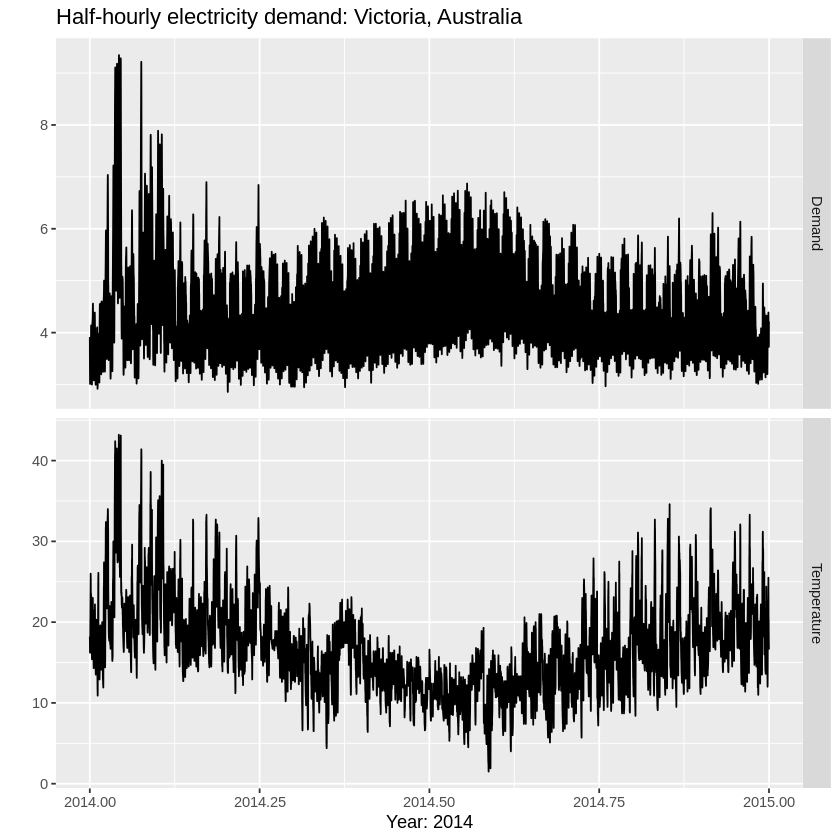

In [ ]:
## Scatterplots

autoplot(elecdemand[,c("Demand","Temperature")], facets=TRUE) +
  xlab("Year: 2014") + ylab("") +
  ggtitle("Half-hourly electricity demand: Victoria, Australia")

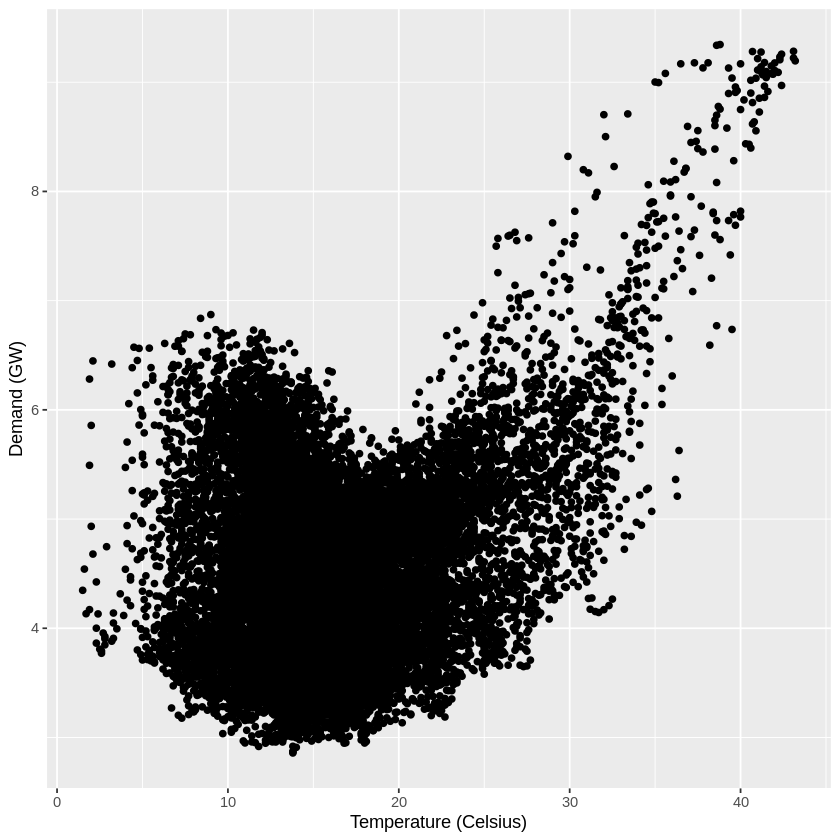

In [ ]:
as.data.frame(elecdemand) |>
  ggplot(aes(x=Temperature, y=Demand)) +
  geom_point() +
  ylab("Demand (GW)") + xlab("Temperature (Celsius)")

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘ggstats’




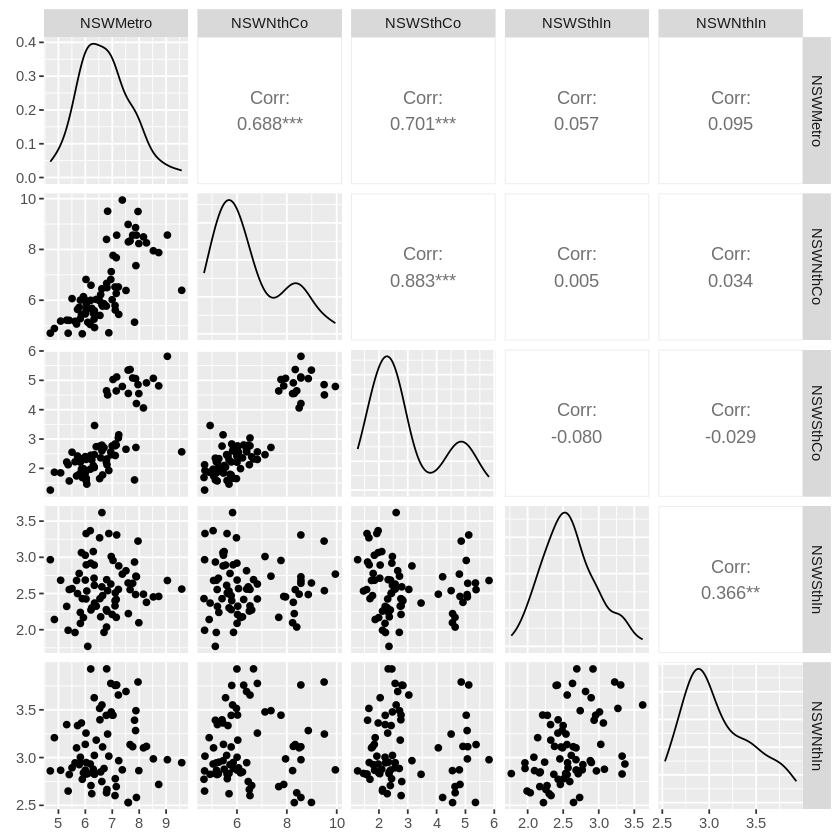

In [ ]:
GGally::ggpairs(as.data.frame(visnights[,1:5]))

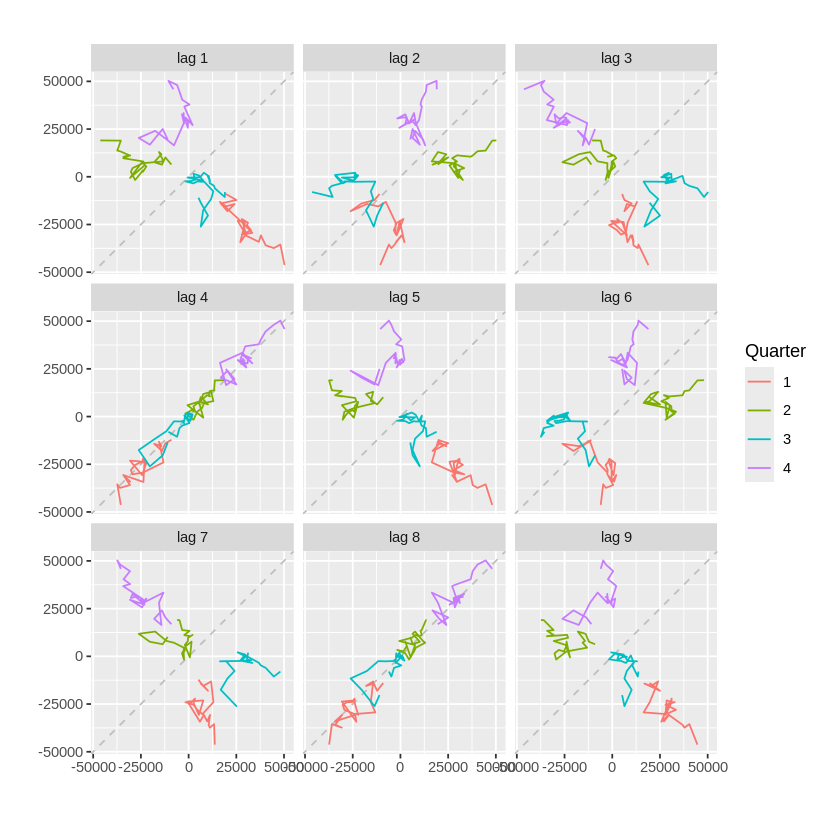

In [ ]:
## Lag Plots

gglagplot(diff(gdp))

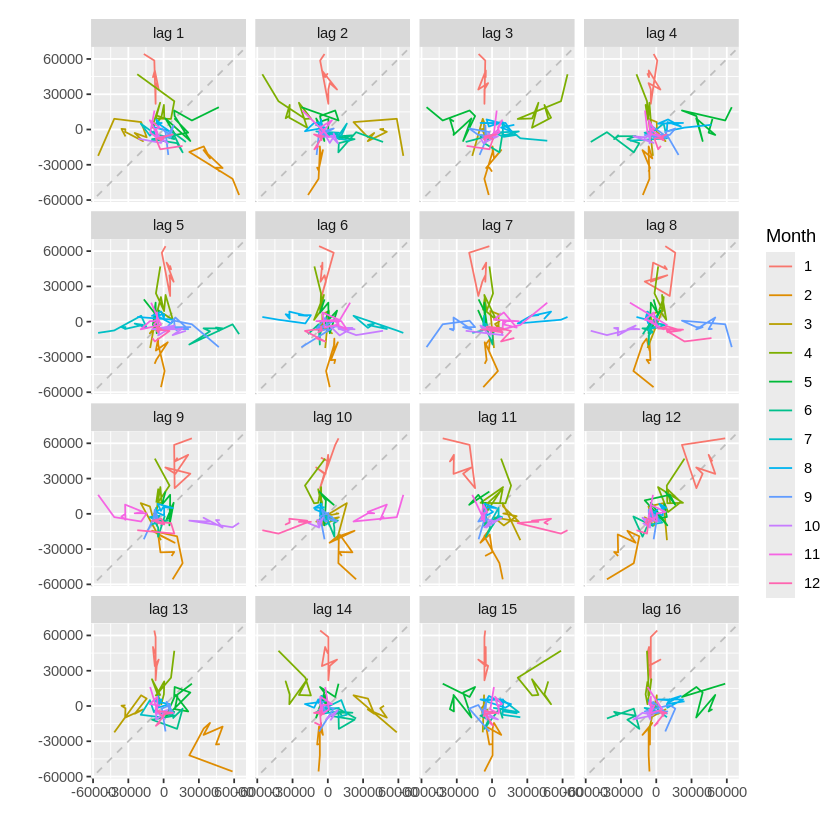

In [ ]:
gglagplot(diff(ofw_deployed))

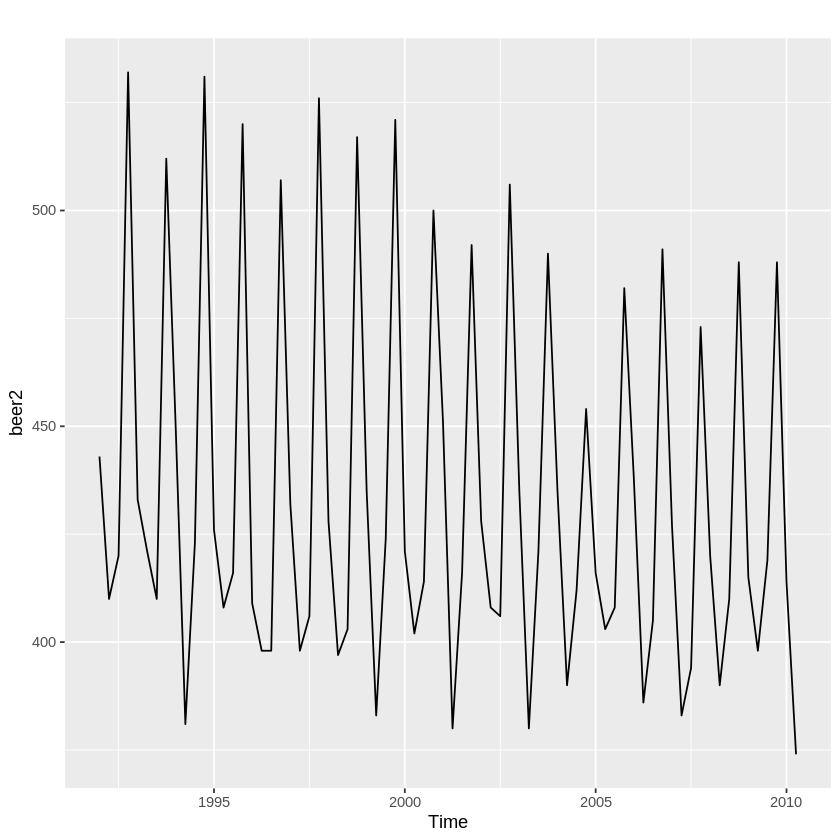

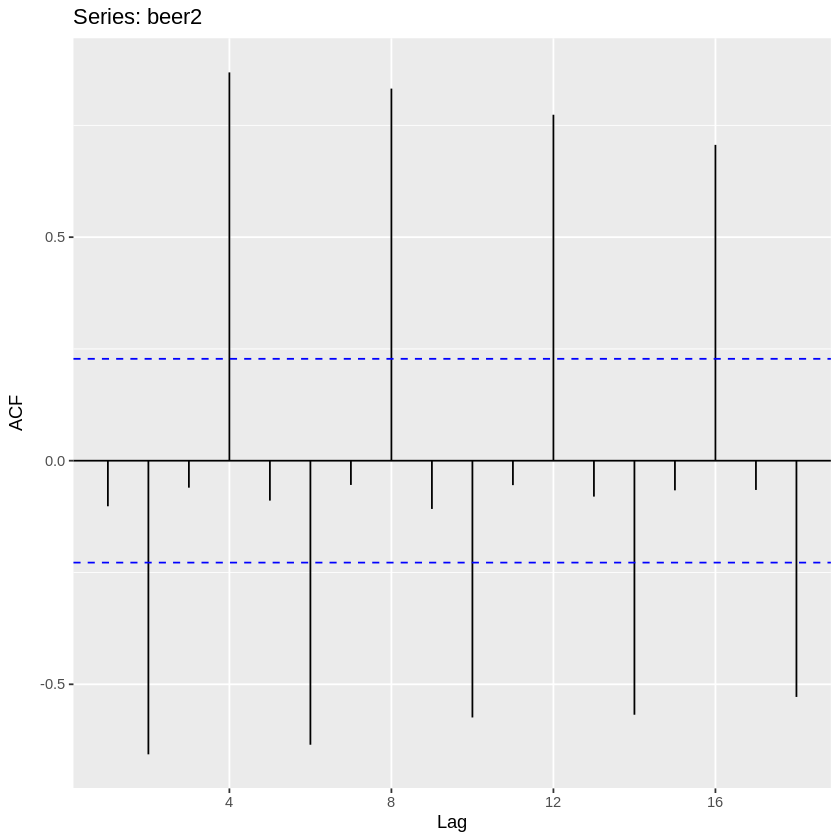

In [ ]:
## Autocorrelation
beer2 <- window(ausbeer, start=1992)
autoplot(beer2)
ggAcf(beer2)

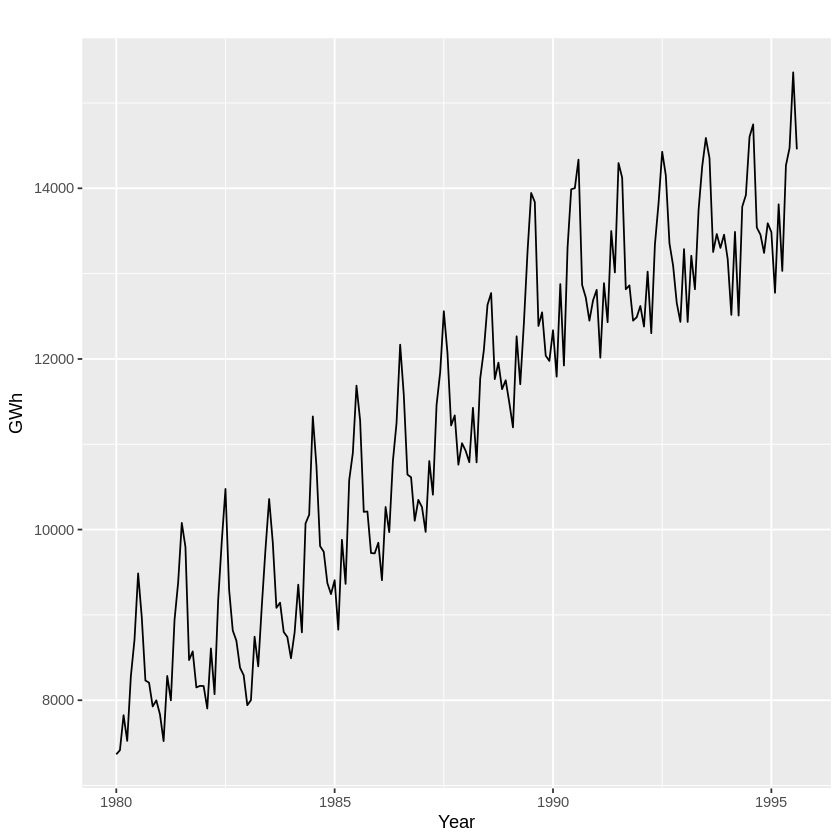

In [ ]:
aelec <- window(elec, start=1980)
autoplot(aelec) + xlab("Year") + ylab("GWh")

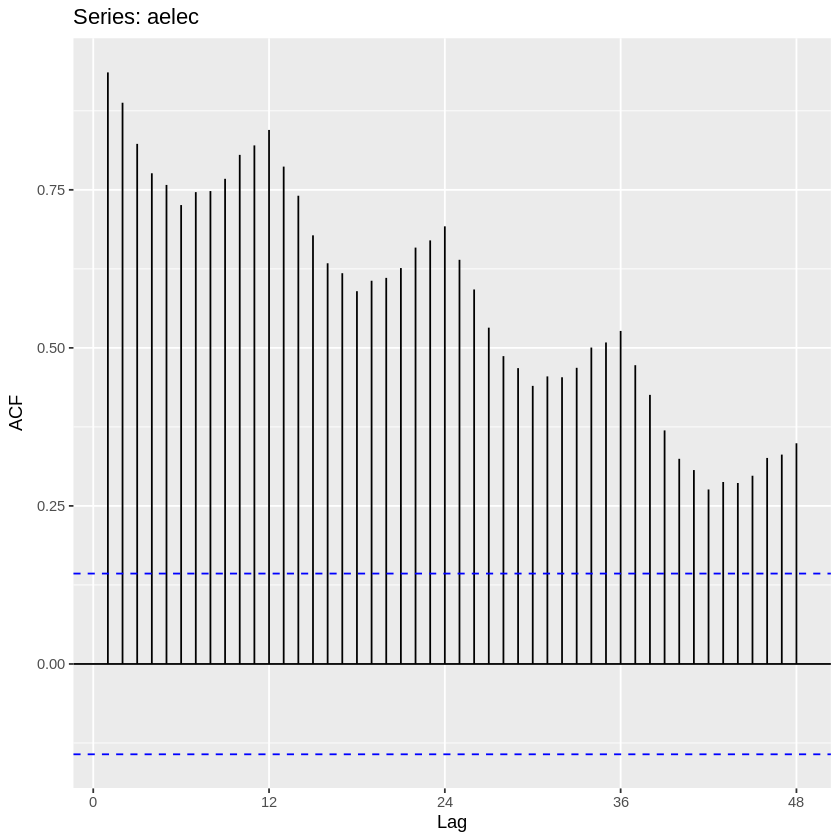

In [ ]:
ggAcf(aelec, lag=48)

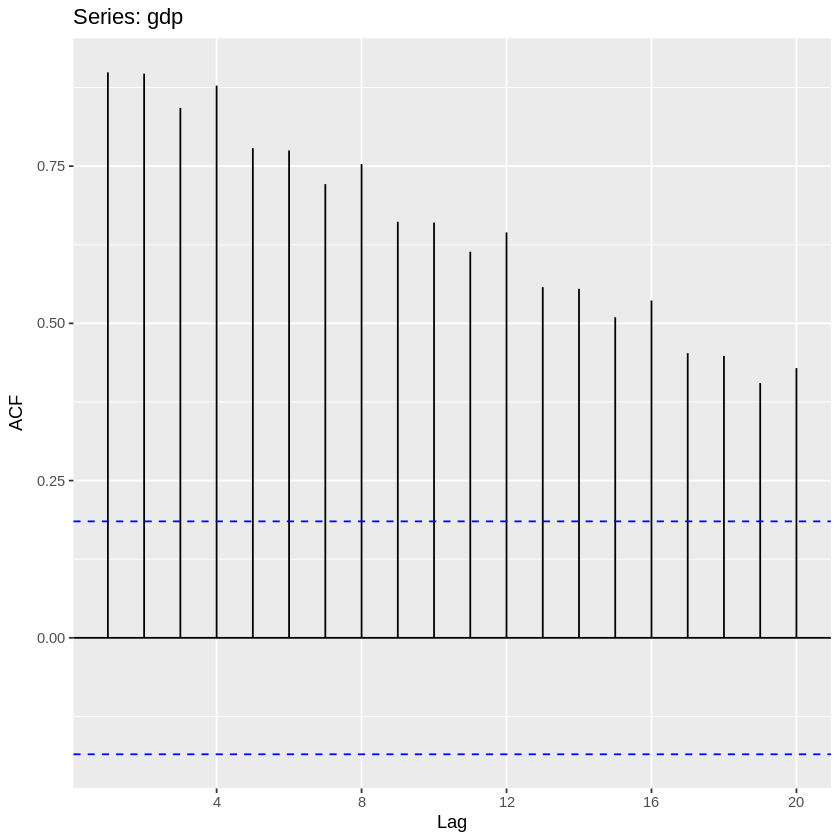

In [ ]:
ggAcf(gdp)

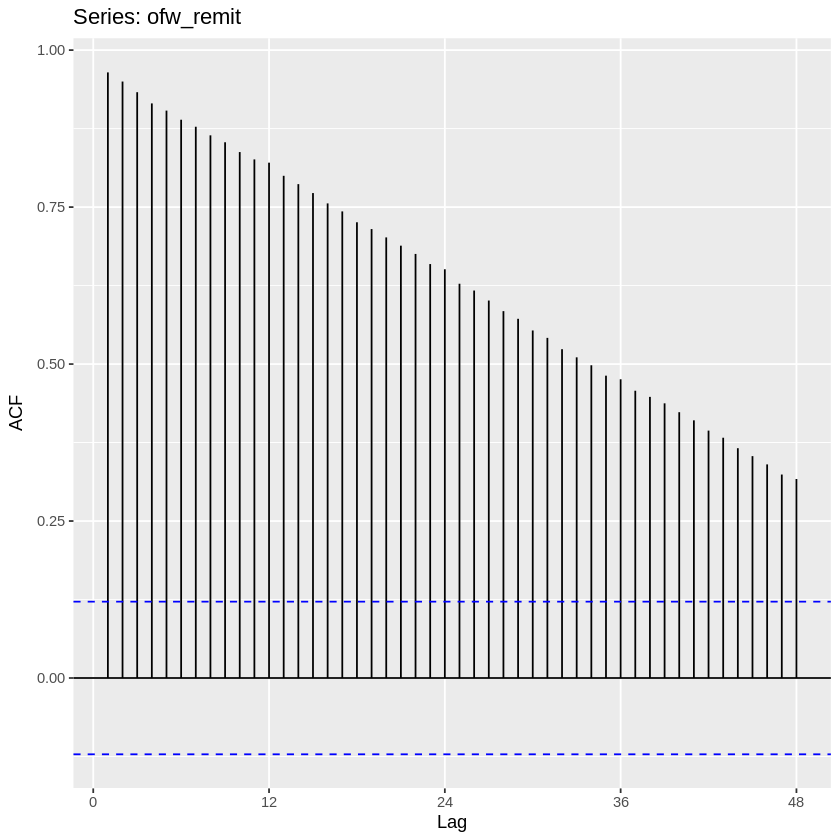

In [ ]:
ggAcf(ofw_remit, lag = 48)

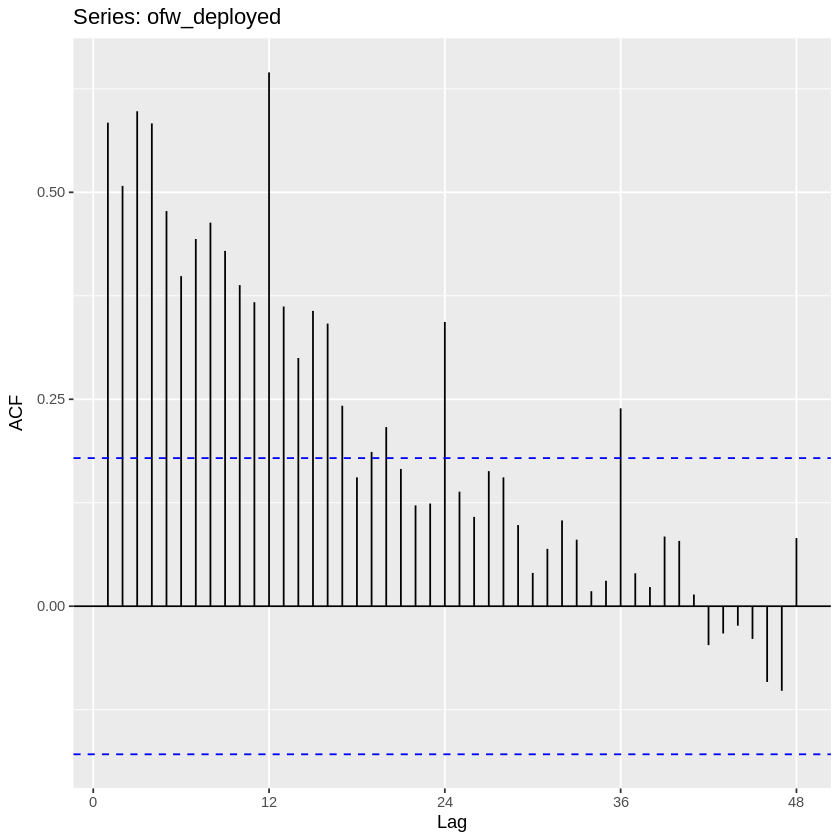

In [ ]:
ggAcf(ofw_deployed, lag = 48)

[1] -0.2457178

[1] 1.09816

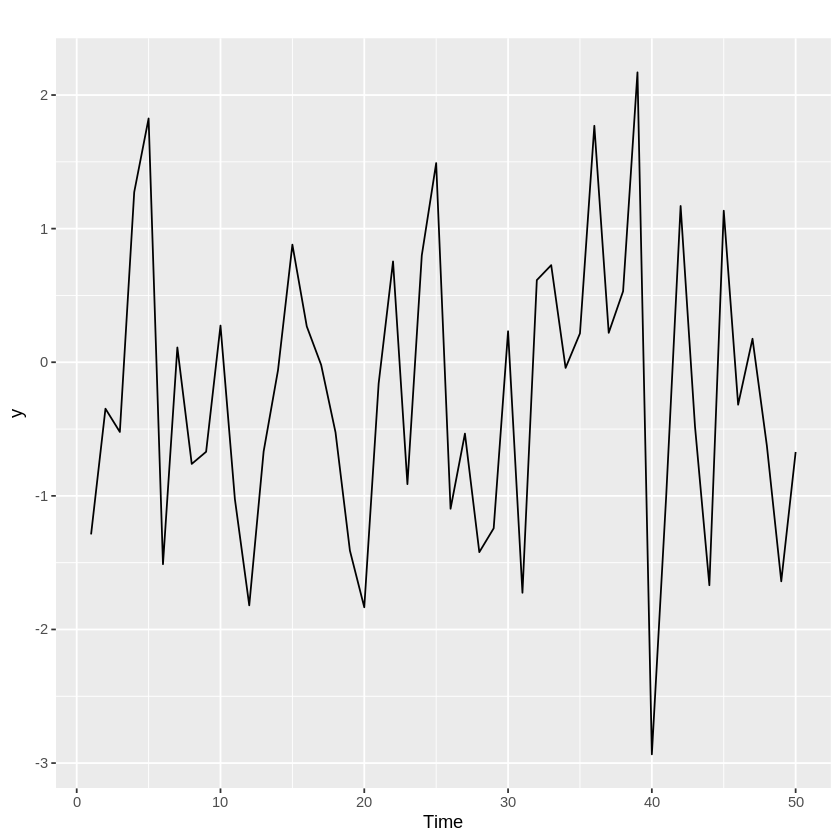

In [ ]:
# White Noise

set.seed(30)
y <- ts(rnorm(50))

autoplot(y)
mean(y)
sd(y)

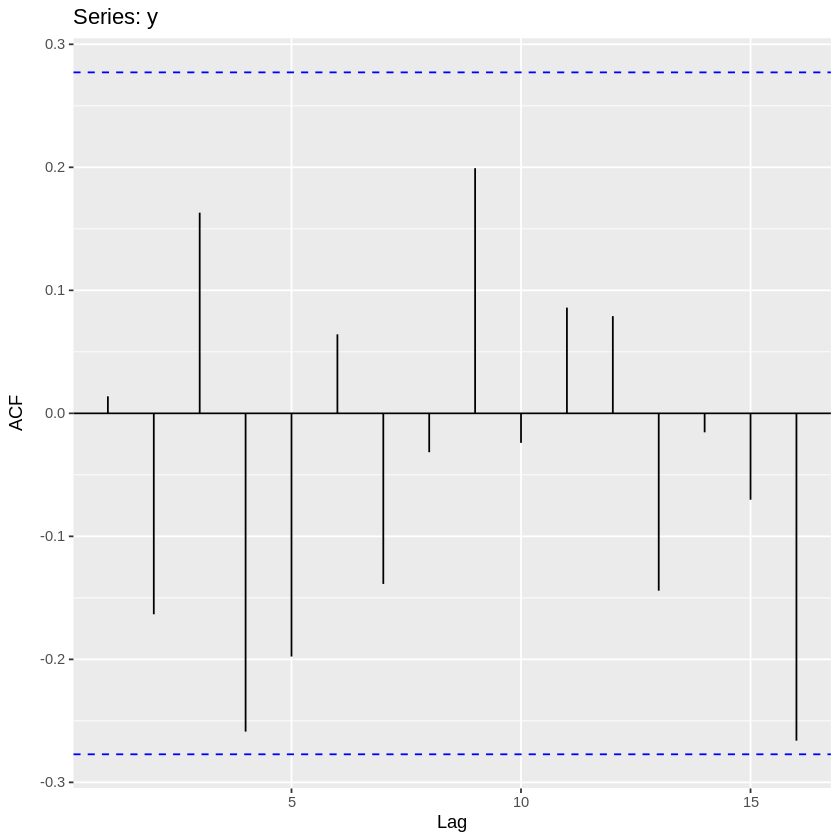

In [ ]:
ggAcf(y)